# 255- Project 
# Crime Incident Clustering & Evaluation


## By Savitri Swapna Maddula (012551799)

### Import necessary Libraries

In [207]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pandas import ExcelWriter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from geopy.distance import great_circle
from pandas import ExcelWriter
import os
import warnings
warnings.filterwarnings('ignore')

## Step-1: Data Collection

In [208]:
incident_df = pd.read_csv('data/police-department-incidents.csv')

In [209]:
incident_df.shape

(2215024, 13)

In [210]:
incident_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,50436712,ASSAULT,BATTERY,Wednesday,2005-04-20T00:00:00,04:00,MISSION,NONE,18TH ST / CASTRO ST,-122.435003,37.760888,"{'latitude': '37.7608878061245', 'human_addres...",5043671204134
1,80049078,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Sunday,2008-01-13T00:00:00,18:00,PARK,NONE,1100 Block of CLAYTON ST,-122.446838,37.762255,"{'latitude': '37.7622550270122', 'human_addres...",8004907806304
2,130366639,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Sunday,2013-05-05T00:00:00,04:10,INGLESIDE,"ARREST, BOOKED",0 Block of SGTJOHNVYOUNG LN,-122.444707,37.724931,"{'latitude': '37.7249307267936', 'human_addres...",13036663904012
3,30810835,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Tuesday,2003-07-08T00:00:00,01:00,SOUTHERN,"ARREST, BOOKED",MASON ST / TURK ST,-122.408954,37.783288,"{'latitude': '37.7832878735491', 'human_addres...",3081083565050
4,130839567,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,2013-10-04T00:00:00,20:53,TENDERLOIN,"ARREST, BOOKED",TURK ST / LEAVENWORTH ST,-122.414056,37.782793,"{'latitude': '37.7827931071006', 'human_addres...",13083956765010


In [211]:
incident_df.shape

(2215024, 13)

In [212]:
incident_df.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

In [213]:
incident_df['Location'][0]

'{\'latitude\': \'37.7608878061245\', \'human_address\': \'{"address":"","city":"","state":"","zip":""}\', \'longitude\': \'-122.435002864271\', \'needs_recoding\': False}'

In [214]:
data = np.array(incident_df[['X', 'Y']])

In [215]:
data.shape

(2215024, 2)

In [216]:
data[0]

array([-122.43500286,   37.76088781])

In [217]:
incident_df.sort_values(["Date"], ascending=True, inplace = True)
incident_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
851987,30004674,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01T00:00:00,09:00,CENTRAL,NONE,STOCKTON ST / PACIFIC AV,-122.408433,37.796704,"{'latitude': '37.7967039278214', 'human_addres...",3000467471000
386228,40401935,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01T00:00:00,09:00,PARK,NONE,800 Block of PAGE ST,-122.434769,37.772571,"{'latitude': '37.7725714571495', 'human_addres...",4040193564070
249948,30001670,DRUG/NARCOTIC,POSSESSION OF MARIJUANA FOR SALES,Wednesday,2003-01-01T00:00:00,10:04,SOUTHERN,"ARREST, BOOKED",6TH ST / MINNA ST,-122.408163,37.780535,"{'latitude': '37.7805345385049', 'human_addres...",3000167016030
1017624,30000581,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Wednesday,2003-01-01T00:00:00,02:05,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.406843,37.798059,"{'latitude': '37.7980587205991', 'human_addres...",3000058104013
746537,30003604,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,2003-01-01T00:00:00,21:55,BAYVIEW,"ARREST, BOOKED",5100 Block of 3RD ST,-122.392073,37.731263,"{'latitude': '37.7312628705449', 'human_addres...",3000360465010


In [218]:
incident_df.reset_index(inplace=True)
incident_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,851987,30004674,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01T00:00:00,09:00,CENTRAL,NONE,STOCKTON ST / PACIFIC AV,-122.408433,37.796704,"{'latitude': '37.7967039278214', 'human_addres...",3000467471000
1,386228,40401935,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01T00:00:00,09:00,PARK,NONE,800 Block of PAGE ST,-122.434769,37.772571,"{'latitude': '37.7725714571495', 'human_addres...",4040193564070
2,249948,30001670,DRUG/NARCOTIC,POSSESSION OF MARIJUANA FOR SALES,Wednesday,2003-01-01T00:00:00,10:04,SOUTHERN,"ARREST, BOOKED",6TH ST / MINNA ST,-122.408163,37.780535,"{'latitude': '37.7805345385049', 'human_addres...",3000167016030
3,1017624,30000581,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Wednesday,2003-01-01T00:00:00,02:05,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.406843,37.798059,"{'latitude': '37.7980587205991', 'human_addres...",3000058104013
4,746537,30003604,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,2003-01-01T00:00:00,21:55,BAYVIEW,"ARREST, BOOKED",5100 Block of 3RD ST,-122.392073,37.731263,"{'latitude': '37.7312628705449', 'human_addres...",3000360465010


## Step-2: Preprocessing

### a) Feature Transformation

In [219]:
incident_df['Resolution Status'] = np.where(incident_df["Resolution"]=='NONE', "Unresolved","Resolved")
incident_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status
0,851987,30004674,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01T00:00:00,09:00,CENTRAL,NONE,STOCKTON ST / PACIFIC AV,-122.408433,37.796704,"{'latitude': '37.7967039278214', 'human_addres...",3000467471000,Unresolved
1,386228,40401935,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01T00:00:00,09:00,PARK,NONE,800 Block of PAGE ST,-122.434769,37.772571,"{'latitude': '37.7725714571495', 'human_addres...",4040193564070,Unresolved
2,249948,30001670,DRUG/NARCOTIC,POSSESSION OF MARIJUANA FOR SALES,Wednesday,2003-01-01T00:00:00,10:04,SOUTHERN,"ARREST, BOOKED",6TH ST / MINNA ST,-122.408163,37.780535,"{'latitude': '37.7805345385049', 'human_addres...",3000167016030,Resolved
3,1017624,30000581,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Wednesday,2003-01-01T00:00:00,02:05,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.406843,37.798059,"{'latitude': '37.7980587205991', 'human_addres...",3000058104013,Resolved
4,746537,30003604,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,2003-01-01T00:00:00,21:55,BAYVIEW,"ARREST, BOOKED",5100 Block of 3RD ST,-122.392073,37.731263,"{'latitude': '37.7312628705449', 'human_addres...",3000360465010,Resolved


### b) Discretization

In [220]:
bins = [0, 7, 14, 20, 23]
group_names = ['EarlyMorning', 'Morning', 'Evening', 'Night']


incident_df["Period of day"] = pd.cut(incident_df["Time"].str.rstrip(':').str.split(':').str[0].astype(int), 
                                 bins, labels=group_names)
incident_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status,Period of day
0,851987,30004674,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01T00:00:00,09:00,CENTRAL,NONE,STOCKTON ST / PACIFIC AV,-122.408433,37.796704,"{'latitude': '37.7967039278214', 'human_addres...",3000467471000,Unresolved,Morning
1,386228,40401935,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01T00:00:00,09:00,PARK,NONE,800 Block of PAGE ST,-122.434769,37.772571,"{'latitude': '37.7725714571495', 'human_addres...",4040193564070,Unresolved,Morning
2,249948,30001670,DRUG/NARCOTIC,POSSESSION OF MARIJUANA FOR SALES,Wednesday,2003-01-01T00:00:00,10:04,SOUTHERN,"ARREST, BOOKED",6TH ST / MINNA ST,-122.408163,37.780535,"{'latitude': '37.7805345385049', 'human_addres...",3000167016030,Resolved,Morning
3,1017624,30000581,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Wednesday,2003-01-01T00:00:00,02:05,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.406843,37.798059,"{'latitude': '37.7980587205991', 'human_addres...",3000058104013,Resolved,EarlyMorning
4,746537,30003604,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,2003-01-01T00:00:00,21:55,BAYVIEW,"ARREST, BOOKED",5100 Block of 3RD ST,-122.392073,37.731263,"{'latitude': '37.7312628705449', 'human_addres...",3000360465010,Resolved,Night


In [221]:
incident_df['Date'] = pd.to_datetime(incident_df['Date'])
incident_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status,Period of day
0,851987,30004674,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,09:00,CENTRAL,NONE,STOCKTON ST / PACIFIC AV,-122.408433,37.796704,"{'latitude': '37.7967039278214', 'human_addres...",3000467471000,Unresolved,Morning
1,386228,40401935,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,09:00,PARK,NONE,800 Block of PAGE ST,-122.434769,37.772571,"{'latitude': '37.7725714571495', 'human_addres...",4040193564070,Unresolved,Morning
2,249948,30001670,DRUG/NARCOTIC,POSSESSION OF MARIJUANA FOR SALES,Wednesday,2003-01-01,10:04,SOUTHERN,"ARREST, BOOKED",6TH ST / MINNA ST,-122.408163,37.780535,"{'latitude': '37.7805345385049', 'human_addres...",3000167016030,Resolved,Morning
3,1017624,30000581,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Wednesday,2003-01-01,02:05,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.406843,37.798059,"{'latitude': '37.7980587205991', 'human_addres...",3000058104013,Resolved,EarlyMorning
4,746537,30003604,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,2003-01-01,21:55,BAYVIEW,"ARREST, BOOKED",5100 Block of 3RD ST,-122.392073,37.731263,"{'latitude': '37.7312628705449', 'human_addres...",3000360465010,Resolved,Night


### c) Feature Creation

In [222]:
incident_df["Year"] = incident_df["Date"].map(lambda x: x.year)
incident_df["Day"] = incident_df["Date"].map(lambda x: x.day)
incident_df["Month"] = incident_df["Date"].map(lambda x: x.month)
incident_df.tail()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status,Period of day,Year,Day,Month
2215019,2215016,180360829,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,2018-05-15,01:27,MISSION,NONE,700 Block of SHOTWELL ST,-122.415617,37.756414,"{'latitude': '37.75641376904809', 'human_addre...",18036082965016,Unresolved,EarlyMorning,2018,15,5
2215020,2215015,180360794,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,2018-05-15,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.447761,37.769846,"{'latitude': '37.76984648754153', 'human_addre...",18036079462050,Resolved,NaN,2018,15,5
2215021,2215022,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,2018-05-15,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.419258,37.775146,"{'latitude': '37.77514629165388', 'human_addre...",18036094864020,Unresolved,EarlyMorning,2018,15,5
2215022,2215017,180360835,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,2018-05-15,01:25,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.410042,37.781954,"{'latitude': '37.781953653725715', 'human_addr...",18036083503074,Resolved,EarlyMorning,2018,15,5
2215023,2215023,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,37.775207,"{'latitude': '37.77520656149669', 'human_addre...",18036228907023,Unresolved,Morning,2018,15,5


## Step-3: Data Sampling

## 1. 2018 Year Data

In [223]:
crimes_2018_df = incident_df.loc[incident_df['Year'] == 2018]
crimes_2018_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status,Period of day,Year,Day,Month
2168356,2167269,180002009,OTHER OFFENSES,RECKLESS DRIVING,Monday,2018-01-01,17:02,TENDERLOIN,JUVENILE BOOKED,ELLIS ST / JONES ST,-122.412784,37.784866,"{'latitude': '37.7848656939526', 'human_addres...",18000200965020,Resolved,Evening,2018,1,1
2168357,2197016,180303017,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Monday,2018-01-01,00:01,CENTRAL,NONE,400 Block of POST ST,-122.409256,37.788240,"{'latitude': '37.78823989977801', 'human_addre...",18030301706302,Unresolved,NaN,2018,1,1
2168358,2167246,180001744,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,2018-01-01,12:39,CENTRAL,NONE,800 Block of FRONT ST,-122.399903,37.799223,"{'latitude': '37.79922304542142', 'human_addre...",18000174406244,Unresolved,Morning,2018,1,1
2168359,2167245,180001738,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Monday,2018-01-01,16:10,SOUTHERN,"ARREST, BOOKED",100 Block of 6TH ST,-122.408369,37.780778,"{'latitude': '37.78077842537316', 'human_addre...",18000173871024,Resolved,Evening,2018,1,1
2168360,2177595,186029102,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,2018-01-01,20:00,NORTHERN,NONE,POST ST / WEBSTER ST,-122.431370,37.785373,"{'latitude': '37.785373043547196', 'human_addr...",18602910206244,Unresolved,Evening,2018,1,1


In [224]:
crimes_2018_df.shape

(46668, 19)

In [225]:
list(crimes_2018_df.columns)[1:]

['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId',
 'Resolution Status',
 'Period of day',
 'Year',
 'Day',
 'Month']

In [227]:
path = os.getcwd()
path = path +'\out'
os.mkdir(path)

In [296]:
path = os.getcwd()
path = path +'\plots'
os.mkdir(path)

In [228]:
writer = ExcelWriter('out/crimes_2018_df.xlsx')
crimes_2018_df.to_excel(writer,'Sheet1')
writer.save()

In [229]:
data = np.array(crimes_2018_df[['X', 'Y']])

### 1.1 Clustering

In [230]:
df = pd.DataFrame(data, columns = ['point_longitude_2018', 'point_latitude_2018'])

writer = ExcelWriter('out/points_2018_plot.xlsx')
df.to_excel(writer,'Sheet1', columns = ['point_longitude_2018', 'point_latitude_2018'])
writer.save()

In [231]:
kmeans = KMeans(n_clusters=100, random_state=0).fit(data)

### 1.2 Predictions

In [232]:
y_means = kmeans.predict(data)

In [233]:
centers = kmeans.cluster_centers_

### 1.3 Visualization

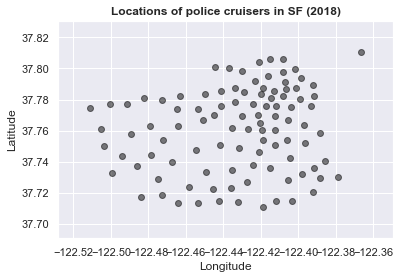

In [234]:
plt.title('Locations of police cruisers in SF (2018)', weight ='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(centers[:, 0], centers[:, 1], c= 'black', alpha =0.5)
plt.savefig('plots/centroids_2018.png')  

### 1.4 Average Time Calculation

In [235]:
total_dist = 0
for i in range(len(y_means)):
    coords_1 = (centers[y_means[i]][1] , centers[y_means[i]][0])
    coords_2 = (data[i][1], data[i][0])
    individual_dist = great_circle(coords_1, coords_2).miles
    total_dist = total_dist + individual_dist

In [236]:
avg_dist = total_dist/len(y_means)
avg_dist

0.1755536611606551

In [237]:
calculated_time_2018 = avg_dist *3600 / 10
calculated_time_2018

63.199318017835836

In [238]:
y_means.shape

(46668,)

### 1.5 Saving to File

In [239]:
df = pd.DataFrame(centers, columns = ['centroid_longitude_2018', 'centroid_latitude_2018'])

In [240]:
writer = ExcelWriter('out/centroids_2018_check.xlsx')
df.to_excel(writer,'Sheet1', columns = ['centroid_longitude_2018', 'centroid_latitude_2018'])
writer.save()

## 2. 2017 Data

In [241]:
crimes_2017_df = incident_df.loc[incident_df['Year'] == 2017]
crimes_2017_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status,Period of day,Year,Day,Month
2013583,2011489,176001079,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-01-01,00:30,TARAVAL,NONE,2200 Block of 46TH AV,-122.504887,37.744552,"{'latitude': '37.74455238232007', 'human_addre...",17600107906372,Unresolved,NaN,2017,1,1
2013584,2011488,176001063,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2017-01-01,14:45,PARK,NONE,MASONIC AV / WALLER ST,-122.445108,37.769284,"{'latitude': '37.769283672281794', 'human_addr...",17600106306244,Unresolved,Morning,2017,1,1
2013585,2011487,176001035,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2017-01-01,10:30,PARK,NONE,MARTIN LUTHER KING JR DR / KEZAR DR,-122.458639,37.767200,"{'latitude': '37.767199940345584', 'human_addr...",17600103506244,Unresolved,Morning,2017,1,1
2013586,2011526,176004443,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2017-01-01,14:30,CENTRAL,NONE,300 Block of POST ST,-122.407591,37.788340,"{'latitude': '37.78834011871014', 'human_addre...",17600444306244,Unresolved,Morning,2017,1,1
2013587,2011491,176001477,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,2017-01-01,01:30,SOUTHERN,NONE,3RD ST / MISSION ST,-122.402028,37.786248,"{'latitude': '37.78624834566293', 'human_addre...",17600147706224,Unresolved,EarlyMorning,2017,1,1


In [242]:
crimes_2017_df.shape

(154773, 19)

In [243]:
data = np.array(crimes_2017_df[['X', 'Y']])

### 2.1 Clustering

In [244]:
df = pd.DataFrame(data, columns = ['point_longitude_2017', 'point_latitude_2017'])

writer = ExcelWriter('out/points_2017_plot.xlsx')
df.to_excel(writer,'Sheet1', columns = ['point_longitude_2017', 'point_latitude_2017'])
writer.save()

In [245]:
kmeans = KMeans(n_clusters=100, random_state=0).fit(data)

### 2.2 Predictions

In [246]:
y_means = kmeans.predict(data)

In [247]:
centers = kmeans.cluster_centers_

In [248]:
data.shape, y_means.shape

((154773, 2), (154773,))

### 2.3 Visualization

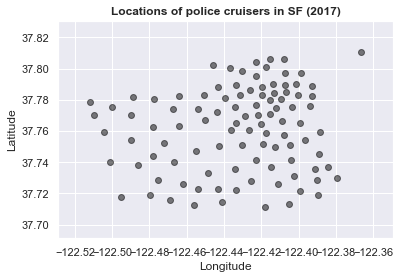

In [249]:
plt.title('Locations of police cruisers in SF (2017)', weight ='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(centers[:, 0], centers[:, 1], c= 'black', alpha =0.5)
plt.savefig('centroids_2017.png')  

### 2.4 Average Time Calculation

In [250]:
total_dist = 0
for i in range(len(y_means)):
    coords_1 = (centers[y_means[i]][1] , centers[y_means[i]][0])
    coords_2 = (data[i][1], data[i][0])
    individual_dist = great_circle(coords_1, coords_2).miles
    total_dist = total_dist + individual_dist

In [251]:
avg_dist = total_dist/len(y_means)
avg_dist

0.17725774030611696

In [252]:
calculated_time_2017 = avg_dist *3600 / 10
calculated_time_2017

63.8127865102021

In [253]:
y_means.shape

(154773,)

### 2.5 Saving to File

In [254]:
df = pd.DataFrame(centers, columns = ['centroid_longitude_2017', 'centroid_latitude_2017'])

In [255]:
writer = ExcelWriter('out/centroids_2017_check.xlsx')
df.to_excel(writer,'Sheet1', columns = ['centroid_longitude_2017', 'centroid_latitude_2017'])
writer.save()

## 3. 2016 Data

In [256]:
crimes_2016_df = incident_df.loc[incident_df['Year'] == 2016]
crimes_2016_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status,Period of day,Year,Day,Month
1862700,1860397,160004542,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,2016-01-01,16:50,RICHMOND,NONE,2600 Block of ELCAMINODELMAR ST,-122.509696,37.780213,"{'latitude': '37.78021342920584', 'human_addre...",16000454206244,Unresolved,Evening,2016,1,1
1862701,1860374,160000835,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,2016-01-01,04:20,CENTRAL,"ARREST, BOOKED",200 Block of POST ST,-122.406022,37.788649,"{'latitude': '37.788649124529414', 'human_addr...",16000083504014,Resolved,EarlyMorning,2016,1,1
1862702,1860377,160000857,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Friday,2016-01-01,05:05,NORTHERN,NONE,900 Block of GEARY ST,-122.418940,37.786049,"{'latitude': '37.78604922300279', 'human_addre...",16000085761030,Unresolved,EarlyMorning,2016,1,1
1862703,1860395,160004263,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Friday,2016-01-01,02:30,CENTRAL,NONE,400 Block of GEARY ST,-122.410722,37.787097,"{'latitude': '37.78709664956634', 'human_addre...",16000426306113,Unresolved,EarlyMorning,2016,1,1
1862704,1860376,160000857,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Friday,2016-01-01,05:05,NORTHERN,NONE,900 Block of GEARY ST,-122.418940,37.786049,"{'latitude': '37.78604922300279', 'human_addre...",16000085728150,Unresolved,EarlyMorning,2016,1,1


In [257]:
crimes_2016_df.shape

(150883, 19)

In [258]:
data = np.array(crimes_2016_df[['X', 'Y']])

### 3.1 Clustering

In [259]:
df = pd.DataFrame(data, columns = ['point_longitude_2016', 'point_latitude_2016'])

writer = ExcelWriter('out/points_2016_plot.xlsx')
df.to_excel(writer,'Sheet1', columns = ['point_longitude_2016', 'point_latitude_2016'])
writer.save()

In [260]:
kmeans = KMeans(n_clusters=100, random_state=0).fit(data)

### 3.2 Predictions

In [261]:
y_means = kmeans.predict(data)

In [262]:
centers = kmeans.cluster_centers_

In [263]:
data.shape, y_means.shape

((150883, 2), (150883,))

### 3.3 Visualization

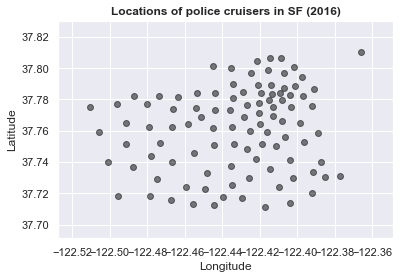

In [264]:
plt.title('Locations of police cruisers in SF (2016)', weight ='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(centers[:, 0], centers[:, 1], c= 'black', alpha =0.5)
plt.savefig('plots/centroids_2016.png')  

### 3.4 Average Time Calculation

In [265]:
total_dist = 0
for i in range(len(y_means)):
    coords_1 = (centers[y_means[i]][1] , centers[y_means[i]][0])
    coords_2 = (data[i][1], data[i][0])
    individual_dist = great_circle(coords_1, coords_2).miles
    total_dist = total_dist + individual_dist

In [266]:
avg_dist = total_dist/len(y_means)
avg_dist

0.17976350746859804

In [267]:
calculated_time_2016 = avg_dist *3600 / 10
calculated_time_2016

64.71486268869529

In [268]:
y_means.shape

(150883,)

### 3.5 Saving to File

In [269]:
df = pd.DataFrame(centers, columns = ['centroid_longitude_2016', 'centroid_latitude_2016'])

In [270]:
writer = ExcelWriter('out/centroids_2016_check.xlsx')
df.to_excel(writer,'Sheet1', columns = ['centroid_longitude_2016', 'centroid_latitude_2016'])
writer.save()

## 4. 2015 Data

In [271]:
crimes_2015_df = incident_df.loc[incident_df['Year'] == 2015]
crimes_2015_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status,Period of day,Year,Day,Month
1706174,1355519,150001213,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Thursday,2015-01-01,10:40,TARAVAL,NONE,300 Block of FAXON AV,-122.460291,37.720945,"{'latitude': '37.7209451195999', 'human_addres...",15000121304138,Unresolved,Morning,2015,1,1
1706175,746492,150001172,OTHER OFFENSES,"LICENSE PLATE, STOLEN",Thursday,2015-01-01,09:28,NORTHERN,"ARREST, BOOKED",SUTTER ST / POLK ST,-122.420120,37.787757,"{'latitude': '37.7877570602411', 'human_addres...",15000117271013,Resolved,Morning,2015,1,1
1706176,756550,156020168,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Thursday,2015-01-01,00:01,PARK,NONE,0 Block of LEVANT ST,-122.442129,37.764256,"{'latitude': '37.7642555194629', 'human_addres...",15602016806224,Unresolved,NaN,2015,1,1
1706177,970664,150001611,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,2015-01-01,13:19,SOUTHERN,NONE,4TH ST / KING ST,-122.394103,37.776383,"{'latitude': '37.7763827130285', 'human_addres...",15000161164020,Unresolved,Morning,2015,1,1
1706178,1769781,150499931,ASSAULT,STALKING,Thursday,2015-01-01,00:01,NORTHERN,NONE,700 Block of FILLMORE ST,-122.431225,37.776315,"{'latitude': '37.7763145302112', 'human_addres...",15049993115201,Unresolved,NaN,2015,1,1


In [272]:
crimes_2015_df.shape

(156526, 19)

In [273]:
data = np.array(crimes_2015_df[['X', 'Y']])

### 4.1 Clustering

In [274]:
df = pd.DataFrame(data, columns = ['point_longitude_2015', 'point_latitude_2015'])

writer = ExcelWriter('out/points_2015_plot.xlsx')
df.to_excel(writer,'Sheet1', columns = ['point_longitude_2015', 'point_latitude_2015'])
writer.save()

In [275]:
kmeans = KMeans(n_clusters=100, random_state=0).fit(data)

### 4.2 Predictions

In [276]:
y_means = kmeans.predict(data)

In [277]:
centers = kmeans.cluster_centers_

In [278]:
data.shape, y_means.shape

((156526, 2), (156526,))

### 4.3 Visualization

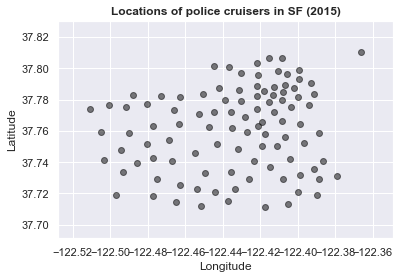

In [279]:
plt.title('Locations of police cruisers in SF (2015)', weight ='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(centers[:, 0], centers[:, 1], c= 'black', alpha =0.5)
plt.savefig('plots/centroids_2015.png')  

### 4.4 Average Time Calculation

In [280]:
total_dist = 0
for i in range(len(y_means)):
    coords_1 = (centers[y_means[i]][1] , centers[y_means[i]][0])
    coords_2 = (data[i][1], data[i][0])
    individual_dist = great_circle(coords_1, coords_2).miles
    total_dist = total_dist + individual_dist

In [281]:
avg_dist = total_dist/len(y_means)
avg_dist

0.17909027604793587

In [282]:
calculated_time_2015 = avg_dist *3600 / 10
calculated_time_2015

64.47249937725692

In [283]:
y_means.shape

(156526,)

### 4.5 Saving to File

In [284]:
df = pd.DataFrame(centers, columns = ['centroid_longitude_2015', 'centroid_latitude_2015'])

In [285]:
writer = ExcelWriter('out/centroids_2015_check.xlsx')
df.to_excel(writer,'Sheet1', columns = ['centroid_longitude_2015', 'centroid_latitude_2015'])
writer.save()

## 5. 2014 Data

In [286]:
crimes_2014_df = incident_df.loc[incident_df['Year'] == 2014]
crimes_2014_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status,Period of day,Year,Day,Month
1556046,925368,140094278,NON-CRIMINAL,COURTESY REPORT,Wednesday,2014-01-01,00:01,BAYVIEW,UNFOUNDED,1500 Block of MCKINNON AV,-122.388278,37.735395,"{'latitude': '37.7353946024567', 'human_addres...",14009427868030,Resolved,NaN,2014,1,1
1556047,102797,140000281,OTHER OFFENSES,RESISTING ARREST,Wednesday,2014-01-01,02:20,CENTRAL,NONE,0 Block of DRUMM ST,-122.396556,37.794117,"{'latitude': '37.7941169057941', 'human_addres...",14000028127170,Unresolved,EarlyMorning,2014,1,1
1556048,115281,140000639,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,2014-01-01,00:53,NORTHERN,NONE,3200 Block of DIVISADERO ST,-122.442817,37.799490,"{'latitude': '37.7994896740468', 'human_addres...",14000063928150,Unresolved,NaN,2014,1,1
1556049,221408,140768984,EMBEZZLEMENT,EMBEZZLEMENT (GENERAL),Wednesday,2014-01-01,12:00,CENTRAL,NONE,300 Block of JEFFERSON ST,-122.418277,37.807962,"{'latitude': '37.8079624466014', 'human_addres...",14076898410090,Unresolved,Morning,2014,1,1
1556050,63062,140021384,NON-CRIMINAL,LOST PROPERTY,Wednesday,2014-01-01,16:00,MISSION,NONE,20TH ST / DOLORES ST,-122.425768,37.758226,"{'latitude': '37.7582261992584', 'human_addres...",14002138471000,Unresolved,Evening,2014,1,1


In [287]:
crimes_2014_df.shape

(150128, 19)

In [288]:
data = np.array(crimes_2014_df[['X', 'Y']])

### 5.1 Clustering

In [290]:
df = pd.DataFrame(data, columns = ['point_longitude_2016', 'point_latitude_2016'])

writer = ExcelWriter('out/points_2016_plot.xlsx')
df.to_excel(writer,'Sheet1', columns = ['point_longitude_2016', 'point_latitude_2016'])
writer.save()

In [291]:
kmeans = KMeans(n_clusters=100, random_state=0).fit(data)

### 5.2 Predictions

In [292]:
y_means = kmeans.predict(data)

In [293]:
centers = kmeans.cluster_centers_

In [294]:
data.shape, y_means.shape

((150128, 2), (150128,))

### 5.3 Visualization

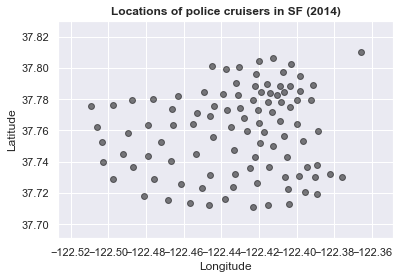

In [297]:
plt.title('Locations of police cruisers in SF (2014)', weight ='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(centers[:, 0], centers[:, 1], c= 'black', alpha =0.5)
plt.savefig('plots/centroids_2014.png')  

### 5.4 Average Time Calculation

In [298]:
total_dist = 0
for i in range(len(y_means)):
    coords_1 = (centers[y_means[i]][1] , centers[y_means[i]][0])
    coords_2 = (data[i][1], data[i][0])
    individual_dist = great_circle(coords_1, coords_2).miles
    total_dist = total_dist + individual_dist

In [299]:
avg_dist = total_dist/len(y_means)
avg_dist

0.173541700050719

In [300]:
calculated_time_2014 = avg_dist *3600 / 10
calculated_time_2014

62.47501201825884

In [301]:
y_means.shape

(150128,)

### 5.5 Saving to File

In [302]:
df = pd.DataFrame(centers, columns = ['centroid_longitude_2014', 'centroid_latitude_2014'])

In [303]:
writer = ExcelWriter('out/centroids_2014_check.xlsx')
df.to_excel(writer,'Sheet1', columns = ['centroid_longitude_2014', 'centroid_latitude_2014'])
writer.save()

## 6. 2013 Data

In [304]:
crimes_2013_df = incident_df.loc[incident_df['Year'] == 2013]
crimes_2013_df.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Resolution Status,Period of day,Year,Day,Month
1403240,347011,136003805,OTHER OFFENSES,TAMPERING WITH A VEHICLE,Tuesday,2013-01-01,01:00,PARK,NONE,300 Block of BAKER ST,-122.441086,37.774102,"{'latitude': '37.7741016205702', 'human_addres...",13600380507100,Unresolved,EarlyMorning,2013,1,1
1403241,135868,130001910,ASSAULT,BATTERY,Tuesday,2013-01-01,15:23,SOUTHERN,EXCEPTIONAL CLEARANCE,200 Block of 6TH ST,-122.406346,37.779167,"{'latitude': '37.7791674218963', 'human_addres...",13000191004134,Resolved,Evening,2013,1,1
1403242,1071006,140669984,SUSPICIOUS OCC,SUSPICIOUS ACT TOWARDS FEMALE,Tuesday,2013-01-01,14:20,NORTHERN,UNFOUNDED,100 Block of WEBSTER ST,-122.428729,37.771608,"{'latitude': '37.7716078589058', 'human_addres...",14066998464060,Resolved,Morning,2013,1,1
1403243,285787,130018084,MISSING PERSON,MISSING ADULT,Tuesday,2013-01-01,21:00,INGLESIDE,LOCATED,200 Block of LOWELL ST,-122.445086,37.708900,"{'latitude': '37.7089002573584', 'human_addres...",13001808474000,Resolved,Night,2013,1,1
1403244,350923,130002275,SECONDARY CODES,DOMESTIC VIOLENCE,Tuesday,2013-01-01,17:39,INGLESIDE,"ARREST, BOOKED",300 Block of LAGRANDE AV,-122.425724,37.719774,"{'latitude': '37.7197741751287', 'human_addres...",13000227515200,Resolved,Evening,2013,1,1


In [305]:
crimes_2013_df.shape

(152806, 19)

In [306]:
data = np.array(crimes_2013_df[['X', 'Y']])

### 6.1 Clustering

In [307]:
df = pd.DataFrame(data, columns = ['point_longitude_2013', 'point_latitude_2013'])

writer = ExcelWriter('out/points_2013_plot.xlsx')
df.to_excel(writer,'Sheet1', columns = ['point_longitude_2013', 'point_latitude_2013'])
writer.save()

In [308]:
kmeans = KMeans(n_clusters=100, random_state=0).fit(data)

### 6.2 Predictions

In [309]:
y_means = kmeans.predict(data)

In [310]:
centers = kmeans.cluster_centers_

In [311]:
data.shape, y_means.shape

((152806, 2), (152806,))

### 6.3 Visualization

In [312]:
data.shape, y_means.shape

((152806, 2), (152806,))

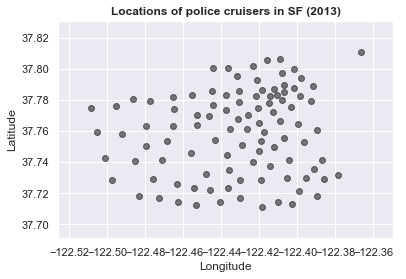

In [313]:
plt.title('Locations of police cruisers in SF (2013)', weight ='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(centers[:, 0], centers[:, 1], c= 'black', alpha =0.5)
plt.savefig('plots/centroids_2013.png')  

### 6.4 Average Time Calculation

In [314]:
total_dist = 0
for i in range(len(y_means)):
    coords_1 = (centers[y_means[i]][1] , centers[y_means[i]][0])
    coords_2 = (data[i][1], data[i][0])
    individual_dist = great_circle(coords_1, coords_2).miles
    total_dist = total_dist + individual_dist

In [315]:
avg_dist = total_dist/len(y_means)
avg_dist

0.1715233020284497

In [316]:
calculated_time_2013 = avg_dist *3600 / 10
calculated_time_2013

61.74838873024189

In [317]:
y_means.shape

(152806,)

### 6.5 Saving to File

In [318]:
df = pd.DataFrame(centers, columns = ['centroid_longitude_2013', 'centroid_latitude_2013'])

In [319]:
writer = ExcelWriter('out/centroids_2013_check.xlsx')
df.to_excel(writer,'Sheet1', columns = ['centroid_longitude_2013', 'centroid_latitude_2013'])
writer.save()

## Step-4: Analytics

### 4.1 Heatmap for crimes in 2018

In [320]:
crimes_2018_cross_tabulate = pd.crosstab(crimes_2018_df.PdDistrict,crimes_2018_df.Category,margins=True)
del crimes_2018_cross_tabulate['All'] 
crimes_2018_cross_tabulate = crimes_2018_cross_tabulate.iloc[:-1] 

In [321]:
column_labels_2018 = list(crimes_2018_cross_tabulate.columns.values)
row_labels_2018 = crimes_2018_cross_tabulate.index.values.tolist()

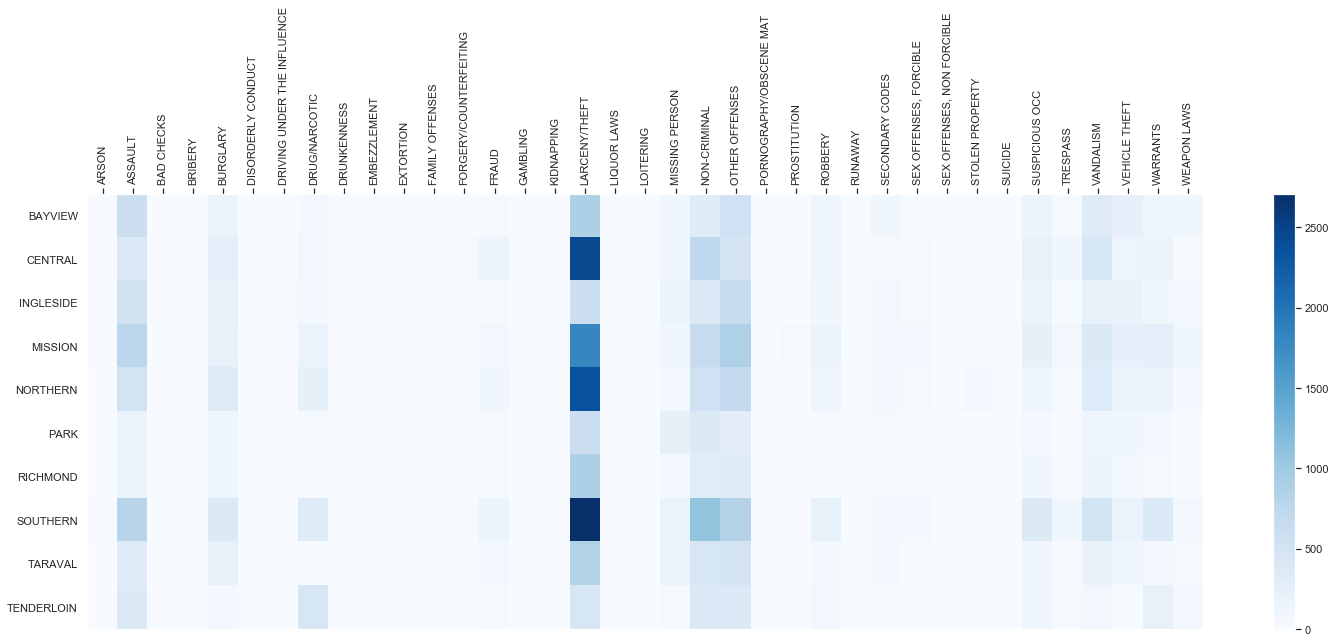

In [322]:
#figure properties
fig,ax = plt.subplots()
heatmap = ax.pcolor(crimes_2018_cross_tabulate,cmap='Blues')
fig.set_size_inches(25,8)

# Ticks 

ax.set_yticks(np.arange(crimes_2018_cross_tabulate.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(crimes_2018_cross_tabulate.shape[1])+0.5, minor=False)

# Tick Labels
ax.set_xticklabels(column_labels_2018)
ax.set_yticklabels(row_labels_2018)
ax.invert_yaxis()
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# Show & Save Plot
plt.colorbar(heatmap)
plt.savefig ("plots/Heat_map_2018.png")
plt.show()

### 4.2 Frequency of Crime percentage by Category

In [323]:
Category_crimes_2018_df = pd.DataFrame(crimes_2018_df.Category.value_counts())
Category_crimes_2018_df["Percentage"] = (Category_crimes_2018_df["Category"]/Category_crimes_2018_df["Category"].sum())*100
Category_crimes_2018_df

,Category,Percentage
LARCENY/THEFT,13632,29.210594
OTHER OFFENSES,5568,11.931088
NON-CRIMINAL,5247,11.243250
ASSAULT,4599,9.854718
VANDALISM,2796,5.991257
BURGLARY,2098,4.495586
SUSPICIOUS OCC,1714,3.672752
WARRANTS,1618,3.467044
DRUG/NARCOTIC,1482,3.175624
VEHICLE THEFT,1475,3.160624


### 4.3 Bar Plot by frequency

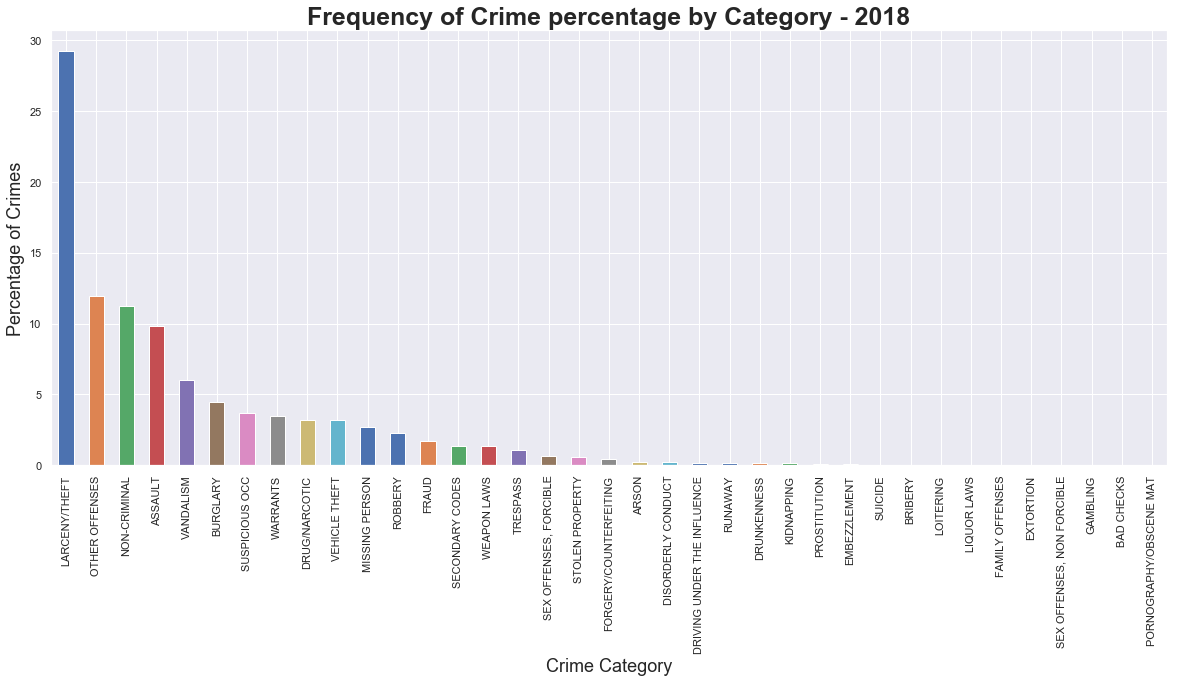

In [324]:
fig = Category_crimes_2018_df["Percentage"].plot(kind="bar", figsize = (20,8), rot=90) 

fig.set_title("Frequency of Crime percentage by Category - 2018", fontsize=25, weight = "bold")
fig.set_xlabel("Crime Category", fontsize=18)
fig.set_ylabel("Percentage of Crimes", fontsize=18)
plt.savefig('plots/perc_crime_category_2018.png')
plt.show()

## Step-5: Evaluation

In [325]:
actual_times = pd.read_excel('data/actual_time.xlsx')

In [326]:
actual_times.head()

,Month,Year,Time
0,January,2016,293
1,February,2016,302
2,March,2016,298
3,April,2016,294
4,May,2016,294


In [327]:
df_2016 = actual_times.loc[actual_times['Year'] == 2016]
df_2016

,Month,Year,Time
0,January,2016,293
1,February,2016,302
2,March,2016,298
3,April,2016,294
4,May,2016,294
5,June,2016,299
6,July,2016,308
7,August,2016,312
8,September,2016,311
9,October,2016,323


In [328]:
df_2017 = actual_times.loc[actual_times['Year'] == 2017]
df_2017

,Month,Year,Time
12,January,2017,306
13,February,2017,314
14,March,2017,315
15,April,2017,311
16,May,2017,309
17,June,2017,310
18,July,2017,302
19,August,2017,324
20,September,2017,325
21,October,2017,326


In [329]:
df_2018 = actual_times.loc[actual_times['Year'] == 2018]
df_2018

,Month,Year,Time
24,January,2018,318
25,February,2018,339
26,March,2018,331
27,April,2018,331
28,May,2018,348
29,June,2018,340
30,July,2018,322
31,August,2018,324


In [330]:
actual_time_2016 = df_2016['Time'].mean()
actual_time_2017 = df_2017['Time'].mean()
actual_time_2018 = df_2018['Time'].mean()

In [331]:
improvement_2018 = actual_time_2018-calculated_time_2018
print("Improvement(min) in the response time:", improvement_2018/60)

Improvement(min) in the response time: 4.473761366369403


In [332]:
improvement_2017 = actual_time_2017-calculated_time_2017
print("Improvement(min) in the response time:", improvement_2017/60)

Improvement(min) in the response time: 4.212842447052187


In [333]:
improvement_2016 = actual_time_2016-calculated_time_2016
print("Improvement(min) in the response time:", improvement_2016/60)

Improvement(min) in the response time: 4.000585621855079


### Improvement Visualization

In [334]:
years = [2016,  2017, 2018]
actual_time = [actual_time_2016, actual_time_2017, actual_time_2018]
calculated_time = [calculated_time_2016, calculated_time_2017, calculated_time_2018]

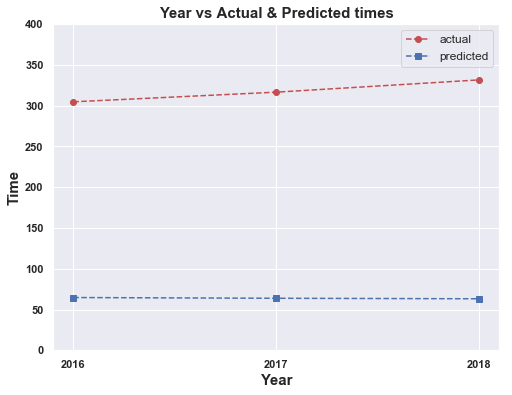

In [335]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

plt.plot(years, actual_time,  c='r', marker="o", label='actual', linestyle='--')
plt.plot(years, calculated_time, c='b', marker="s", label='predicted', linestyle='--')
plt.legend(loc='upper right', fontsize="medium");
plt.xticks(np.arange(min(years), max(years)+1, 1.0), weight = 'bold')
plt.yticks(np.arange(0, 450, 50), weight = 'bold')
plt.title('Year vs Actual & Predicted times', weight = 'bold', fontsize = 15)
plt.xlabel('Year', weight = 'bold', fontsize = 15)
plt.ylabel('Time', weight = 'bold', fontsize = 15)
plt.savefig('plots/Year vs Actual & Predicted times.png')
plt.show()